## Car insurance

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('data/car_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

### Data preparation

In [3]:
# data.info()
data.age = data.age.astype('category')
data.gender = data.gender.astype('bool')
data.driving_experience = data.driving_experience.astype('category')
data.education = data.education.astype('category')
data.income = data.income.astype('category')
data.vehicle_ownership = data.vehicle_ownership.astype('category')
data.vehicle_year = data.vehicle_year.astype('bool')
# data.vehicle_type = data.vehicle_type.astype('bool')
data.married = data.married.astype('bool')
data.children = data.children.astype('int32')
data.past_accidents = data.past_accidents.astype('int32')
data.outcome = data.outcome.astype('category')
data.duis = data.duis.astype('int32')
data.speeding_violations = data.speeding_violations.astype('int32')
data.annual_mileage = data.annual_mileage.fillna(0)
data.annual_mileage = data.annual_mileage.astype('int64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10000 non-null  int64   
 1   age                  10000 non-null  category
 2   gender               10000 non-null  bool    
 3   driving_experience   10000 non-null  category
 4   education            10000 non-null  category
 5   income               10000 non-null  category
 6   credit_score         9018 non-null   float64 
 7   vehicle_ownership    10000 non-null  category
 8   vehicle_year         10000 non-null  bool    
 9   married              10000 non-null  bool    
 10  children             10000 non-null  int32   
 11  postal_code          10000 non-null  int64   
 12  annual_mileage       10000 non-null  int64   
 13  vehicle_type         10000 non-null  object  
 14  speeding_violations  10000 non-null  int32   
 15  duis                

### Data exploration

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


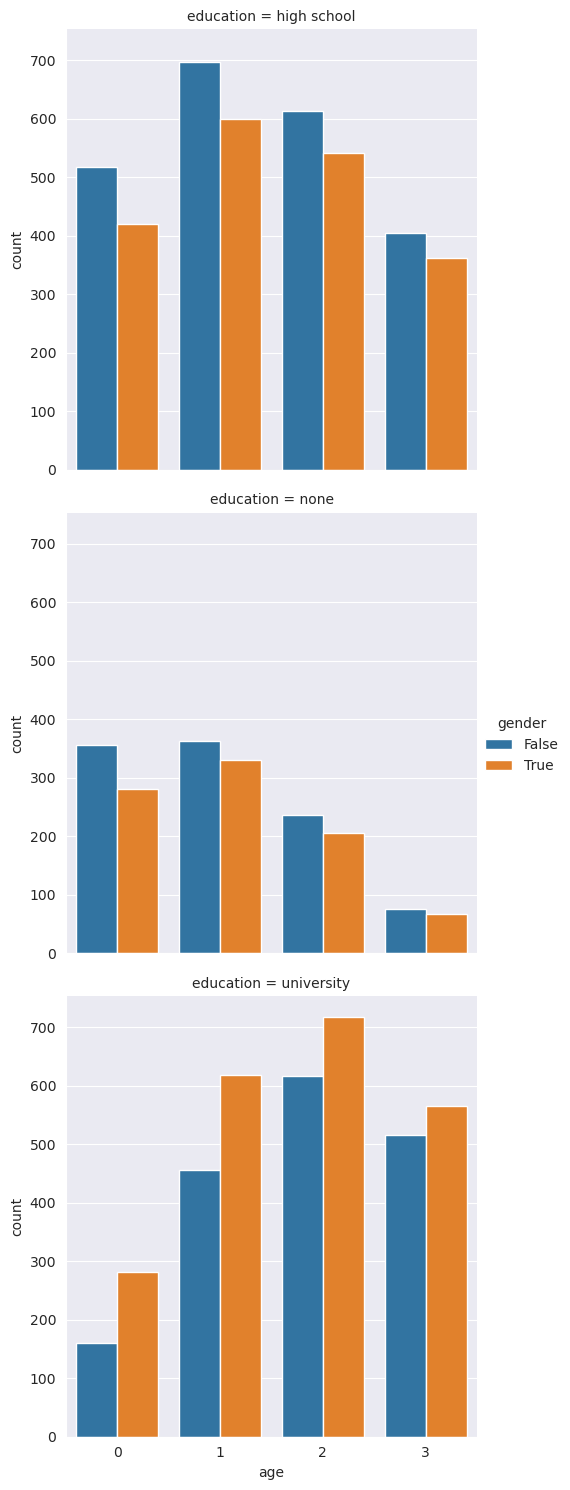

In [4]:
sns.catplot(data=data, x='age', kind='count', hue='gender', row='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


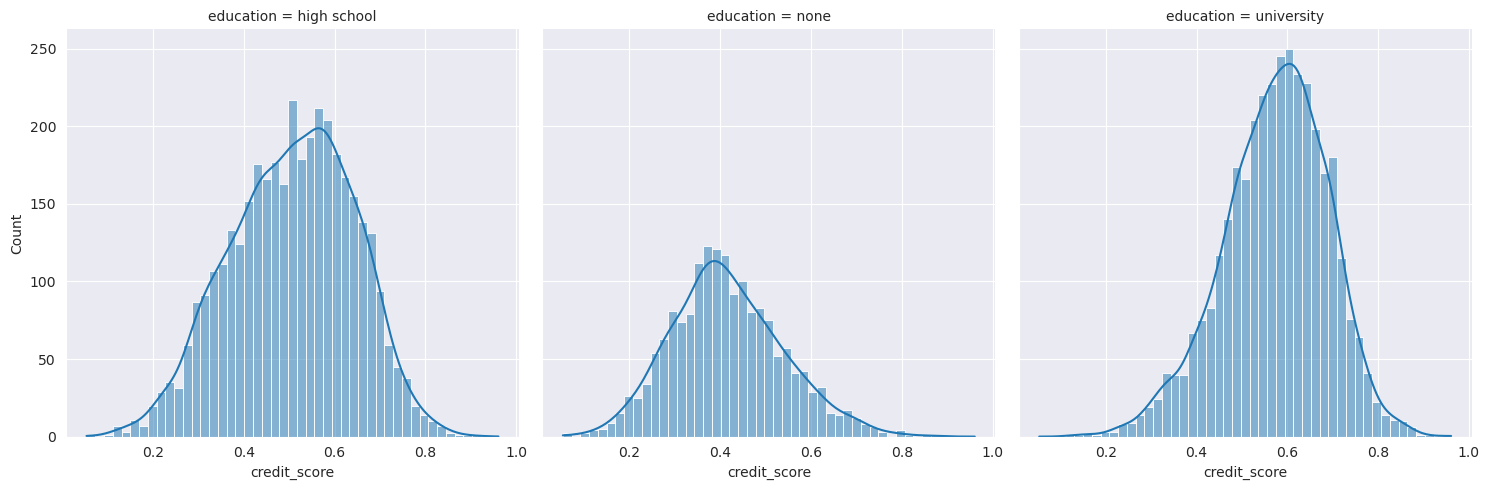

In [8]:
sns.displot(data=data, x='credit_score', kde=True, col='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


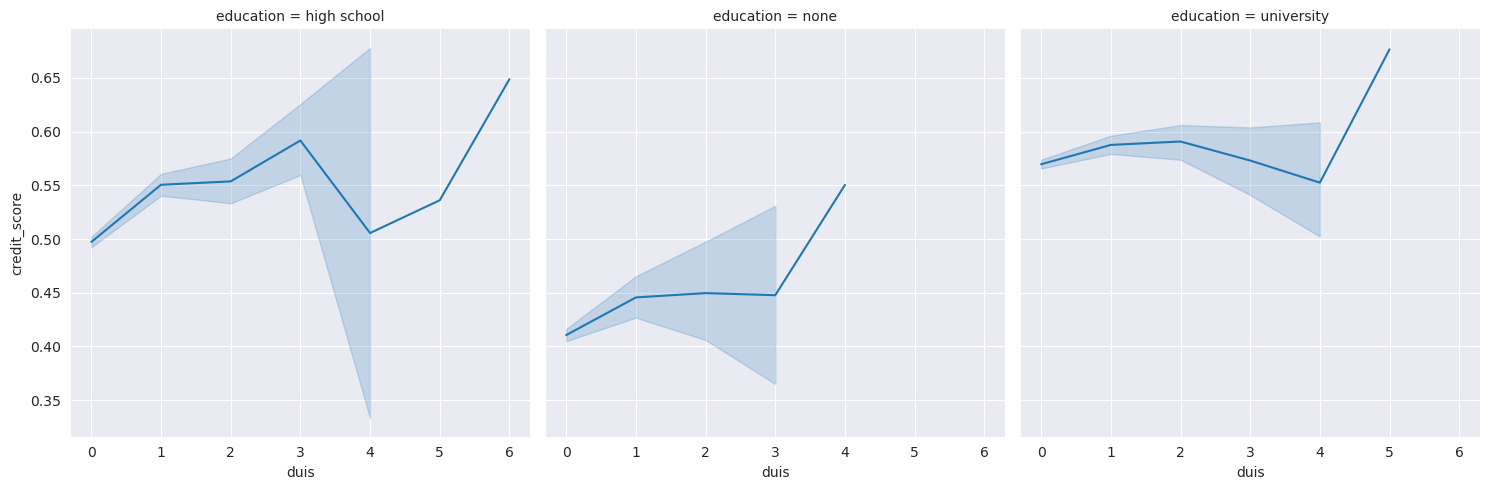

In [12]:
sns.relplot(data=data, x='duis', y='credit_score', kind='line', col='education')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


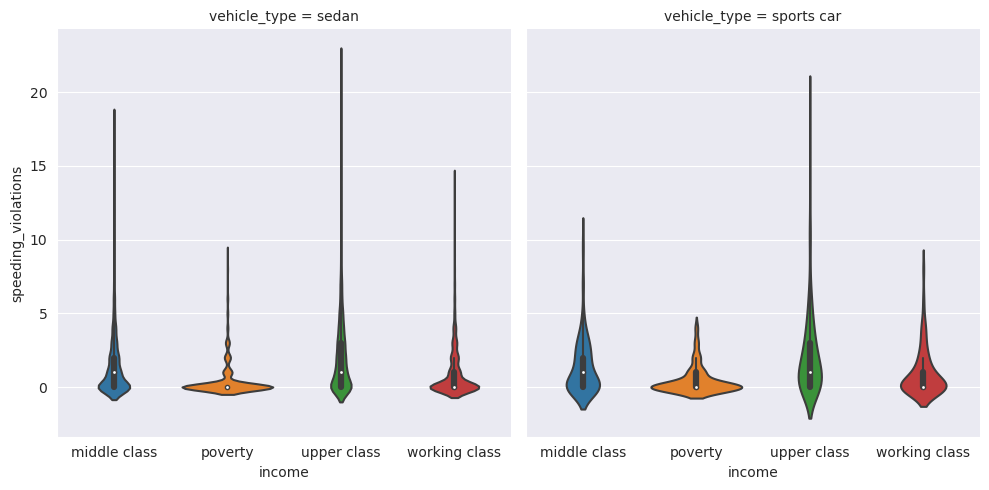

In [28]:
sns.catplot(data=data, x='income', y='speeding_violations', kind='violin', col='vehicle_type')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


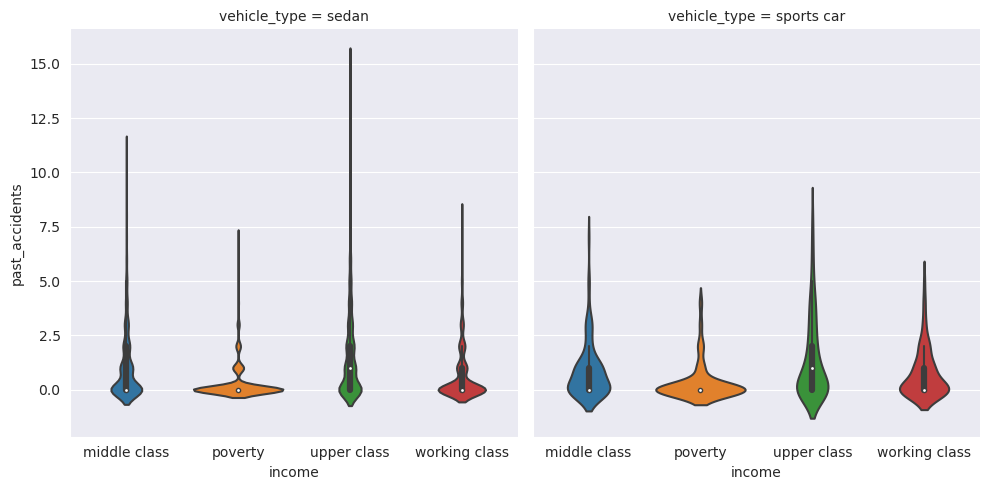

In [29]:
sns.catplot(data=data, x='income', y='past_accidents', kind='violin', col='vehicle_type')

<Axes: xlabel='speeding_violations', ylabel='credit_score'>

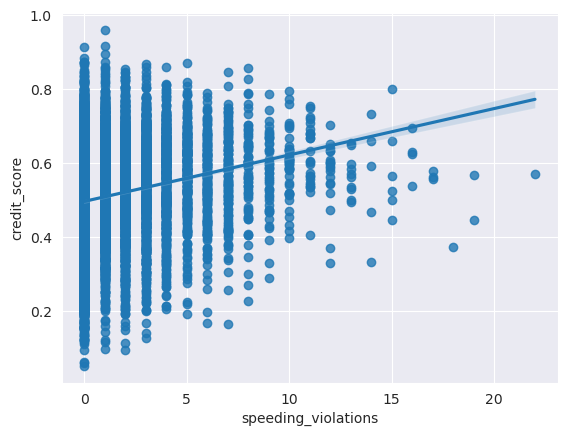

In [32]:
sns.regplot(data=data, x='speeding_violations', y='credit_score')

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


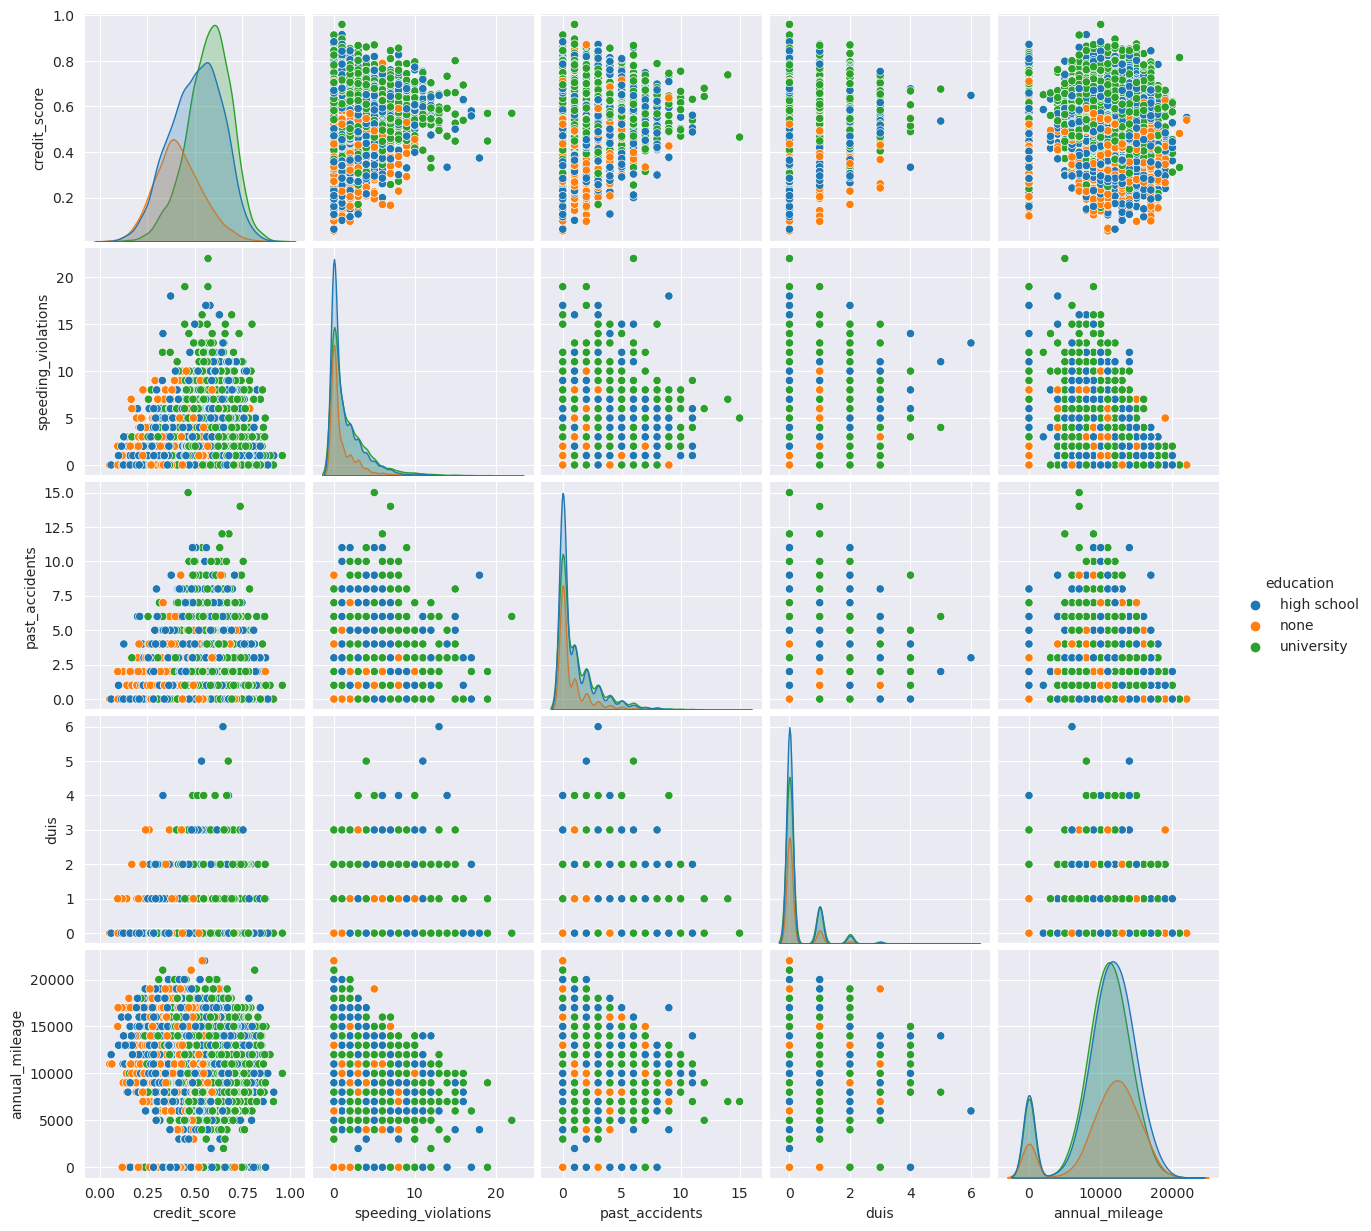

In [43]:
data_num = data[['credit_score', 'speeding_violations', 'past_accidents', 'duis', 'annual_mileage', 'education']]

sns.pairplot(data_num, hue='education')

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BERT to T5
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CoLA    8 non-null      float64
 1   MNLI    8 non-null      float64
 2   MRPC    8 non-null      float64
 3   QNLI    8 non-null      float64
 4   QQP     8 non-null      float64
 5   RTE     8 non-null      float64
 6   SST-2   8 non-null      float64
 7   STS-B   8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes
Task         CoLA  MNLI  MRPC  QNLI   QQP   RTE  SST-2  STS-B
Model                                                        
BERT         60.5  86.7  89.3  92.7  72.1  70.1   94.9   87.6
BiLSTM       11.6  65.6  81.8  74.6  62.5  57.4   82.8   70.3
BiLSTM+Attn  18.6  67.6  83.9  74.3  60.1  58.4   83.0   72.8
BiLSTM+CoVe  18.5  65.4  78.7  70.8  60.6  52.7   81.9   64.4
BiLSTM+ELMo  32.1  67.2  84.7  75.5  61.1  57.4   89.3   70.3


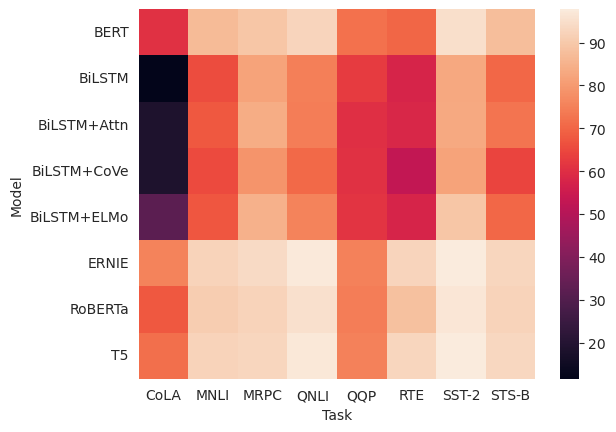

In [23]:
## Heatmap example
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)
glue.info()
print(glue.head())

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


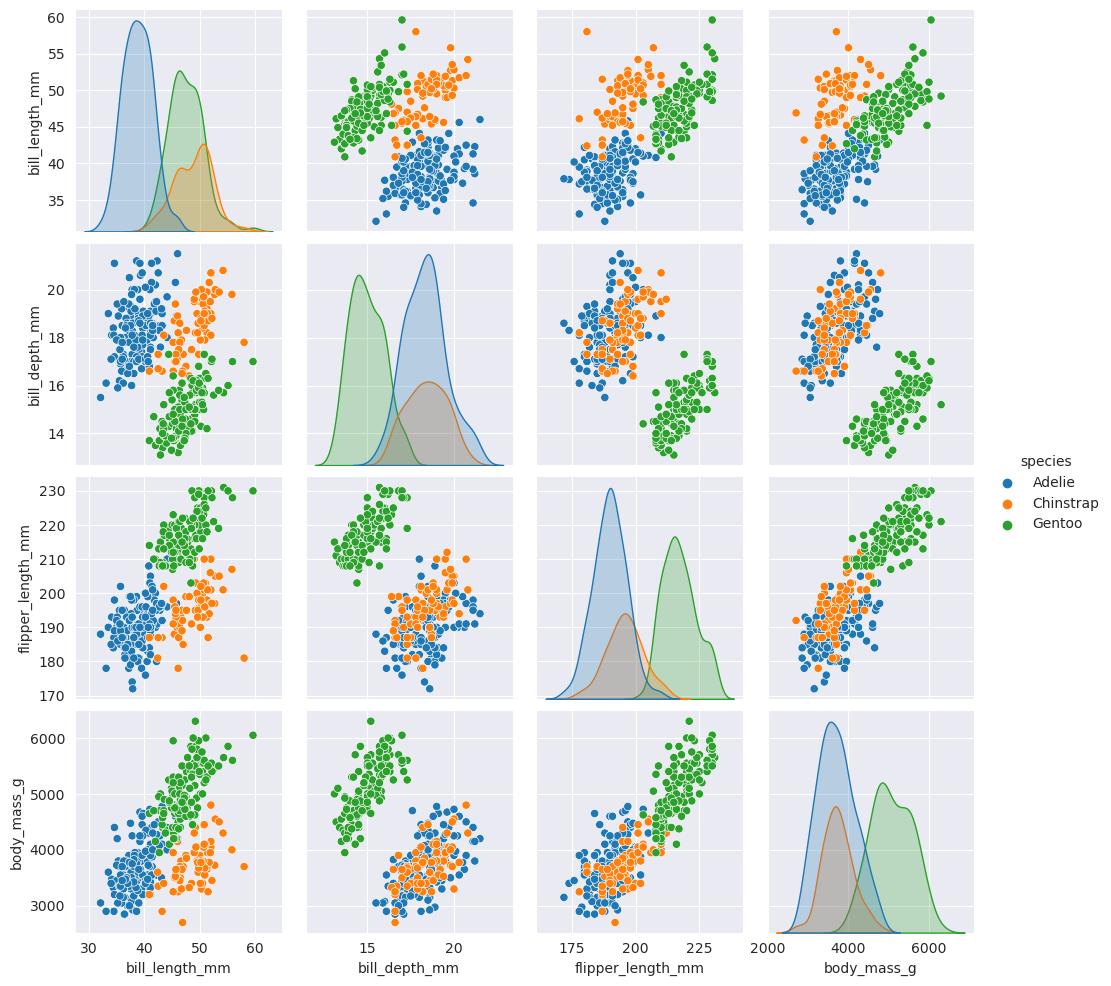

In [34]:
# Pairplot example

penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue='species')